# Lab Assignment 11: Data Visualizations- Rachel Holman
## DS 6001: Practice and Application of Data Science

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

## Problem 0
Import the following libraries:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Problem 1
Write a short paragraph that provides a critique of the following data visualizations. What's good about each figure, and what's not good? Pay particular attention to how well the figure communicates information to a general audience and tells a complete story. Make specific references to the ideas discussed in the first section of the Module 11 Jupyter notebook.

### Part a
<img src="https://i.reddituploads.com/09d4079fd0bf453586b8524478aac4fd?fit=max&h=1536&w=1536&s=0d63d22eed3d44a41002007990acdf2c" width='500'>

[1 point]

The figure shown above is, at first glance, a clear bar graph showing how concerned people rated feeling about the Zika virus. However, when looking closer we notice the percentages displayed above each bar do not corrolate to the size of the bars at all! The largest bar was labeled with the smallest percentage and the others are labeled equally nonsenically. Additionally, there are no values or labels on the y axis which makes this plot especially uninterpretable. There is no hint as to what the bars or percentages really mean apart from a title which provides no context as to who this data came from or when it was collected. Overall, this figure lacks explanation and scale.

### Part b
<img src="https://www.designyourway.net/diverse/2/wronginfo/59426786926.jpg" width='600'>

[1 point]

The strange shell-like pie chart above is a textbook example of defying the principle of proportional ink! Because this pie chart is at an angle to make it 2-D this gives viewers the false impression that slices on the bottom of the pie-chart are larger than they should be proportionally. Additionally, because area is harder for people to understand than distance, this plot and all pie charts are worse for displaying information than a bar graph. Furthermore, the percentages add up to more than 100%! I understand that the values relate to birth rates my sector, but if they do not add to 100% they should NOT be displayed in a pie chart which is universally understood to represent parts of a whole, or proportions. 

### Part c
<img src="https://i.imgur.com/sTVYOIH.jpg" width='400'>

[1 point]

This plot shows above does a good job using color and annotations to show key or causal relationships in the data. However, it is not good that the y-axis has 0 at the top and larger, positive numbers below! This graph should be inverted to show positive values above zero and points only going below the zero line if they are negative so that the viewer does not have to mentally flip the image to see the pattern.  

## Problem 2
For the rest of this lab, we will once again be working with the 2019 General Social Survey.

In [2]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [3]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk'] 
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight', 
                              'educ':'education', 
                              'coninc':'income', 
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige', 
                              'papres10':'father_job_prestige', 
                              'sei10':'socioeconomic_index', 
                              'fechld':'relationship', 
                              'fefam':'male_breadwinner', 
                              'fehire':'hire_women', 
                              'fejobaff':'preference_hire_women', 
                              'fepol':'men_bettersuited', 
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

### Part a
Reorder the categories of `relationship` to "strongly agree", "agree", "disagree", and "strongly disagree".

Then create a simple barplot that shows the frequencies of the categories of `relationship` three times: 
* once using `matplotlib` alone, 
* once using `seaborn`, 
* and once using the `.plot()` method from `pandas`. 

Make sure each barplot has descriptive axis labels and a title, and set a good size for each figure displayed in the Jupyter notebook. [2 points]

In [8]:
gss_clean.relationship = gss_clean.relationship.astype('category').\
                        cat.reorder_categories(['strongly agree',
                                                'agree',
                                                'disagree',
                                                'strongly disagree'])
bardata = gss_clean.relationship.value_counts().sort_index()
bardata

strongly agree       480
agree                670
disagree             324
strongly disagree     76
Name: relationship, dtype: int64

Text(0.5, 1.0, 'Amount of Agreement That Working Mothers Have Strong Relationships With Their Children')

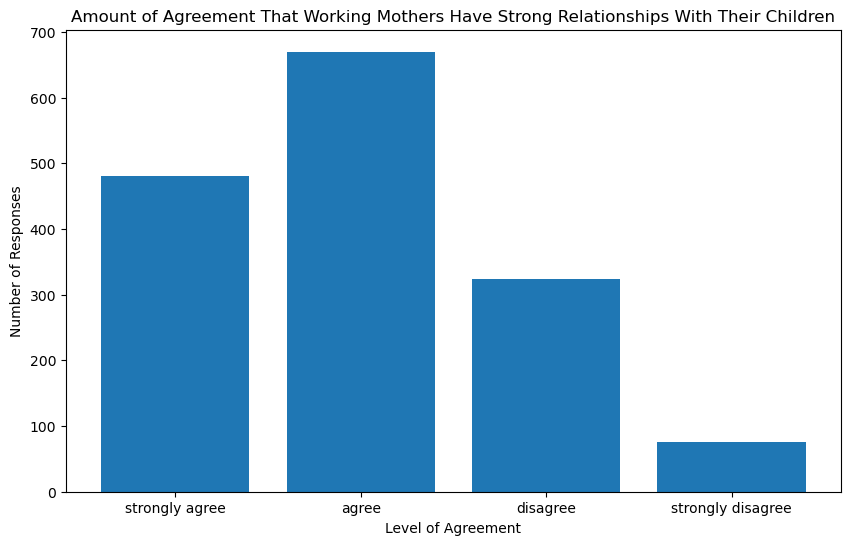

In [20]:
#matplotlib
plt.figure(figsize=(10, 6))
plt.bar(bardata.index, bardata.values)
plt.ylabel('Number of Responses')
plt.xlabel('Level of Agreement')
plt.title('Amount of Agreement That Working Mothers Have Strong Relationships With Their Children')


Text(0.5, 1.0, 'Amount of Agreement That Working Mothers Have Strong Relationships With Their Children')

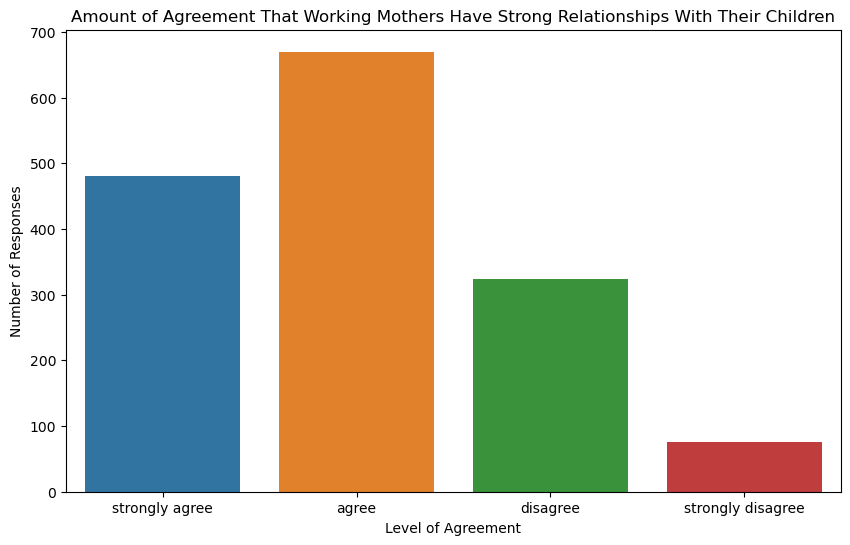

In [21]:
#seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=bardata.index, y=bardata.values)
plt.ylabel('Number of Responses')
plt.xlabel('Level of Agreement')
plt.title('Amount of Agreement That Working Mothers Have Strong Relationships With Their Children')


Text(0.5, 1.0, 'Amount of Agreement That Working Mothers Have Strong Relationships With Their Children')

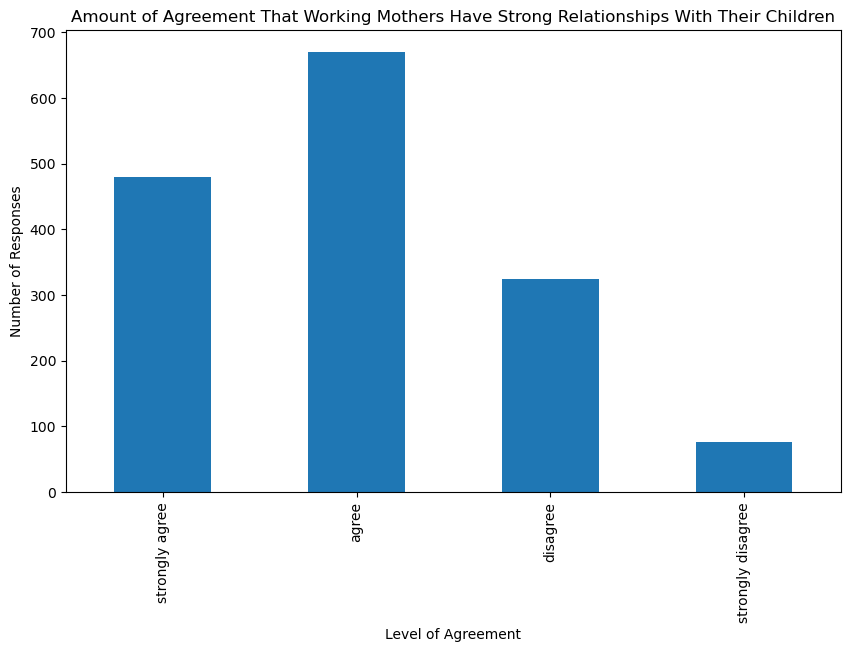

In [28]:
#pandas .plot()
bardata.plot(kind='bar', x='index', y='values',
              figsize = [10,6])
plt.ylabel('Number of Responses')
plt.xlabel('Level of Agreement')
plt.title('Amount of Agreement That Working Mothers Have Strong Relationships With Their Children')


### Part b
Create two barplots that show 
* the frequency of the different levels of agreement for `relationship` for men and for women on the same plot, 
* with bars for men and bars for women side-by-side,
* using different colors for the bars for men and the bars for women,
* listing these colors and the sex they refer to in a legend,
* and labeling each bar with the number the bar represents.

Create the first barplot using `seaborn` with the bars oriented vertically, and create the second barplot using the `.plot()` method with the bars oriented horizontally. [2 points]

In [29]:
gender_rel = gss_clean.groupby(['sex', 'relationship']).size()
gender_rel = gender_rel.reset_index()
gender_rel = gender_rel.rename({0:'count'}, axis=1)
gender_rel

,sex,relationship,count
0,female,strongly agree,337
1,female,agree,344
2,female,disagree,146
3,female,strongly disagree,39
4,male,strongly agree,143
5,male,agree,326
6,male,disagree,178
7,male,strongly disagree,37


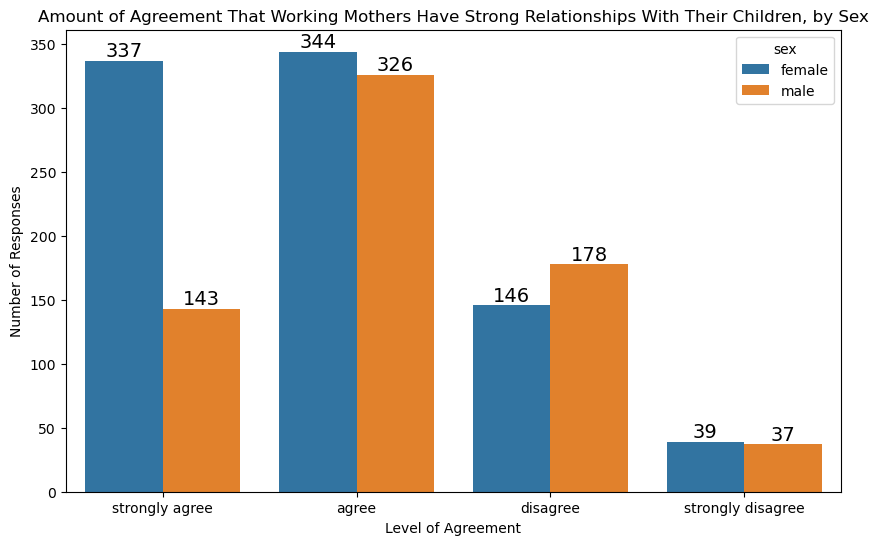

In [42]:
#seaborn v
plt.figure(figsize=(10, 6))
myplot = sns.barplot(x='relationship', y='count', hue='sex', data=gender_rel)
plt.ylabel('Number of Responses')
plt.xlabel('Level of Agreement')
plt.title('Amount of Agreement That Working Mothers Have Strong Relationships With Their Children, by Sex')
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

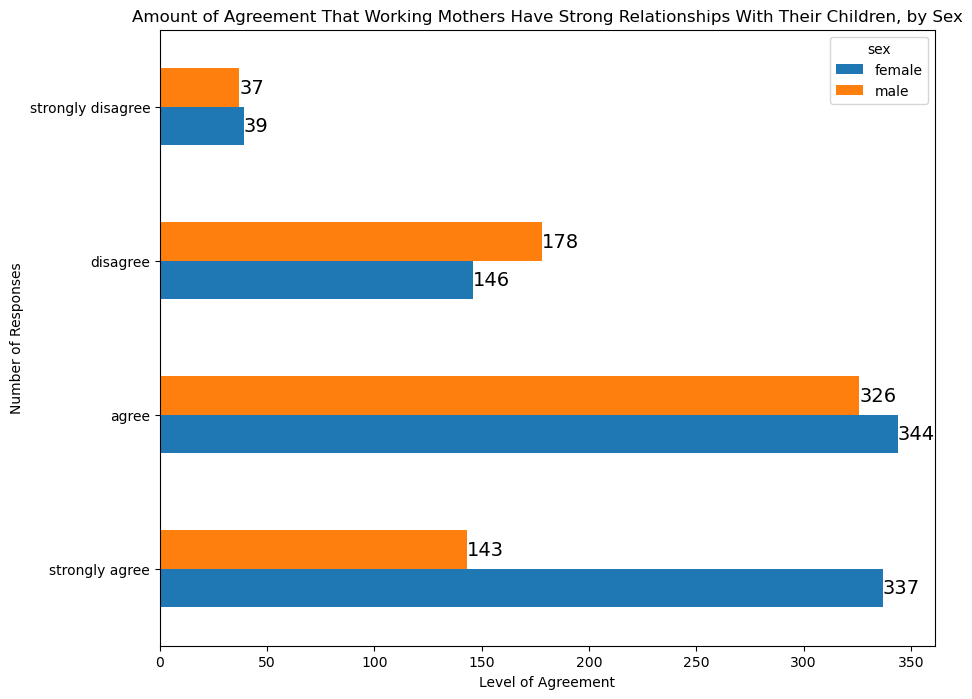

In [43]:
#pandas .plot() h
xtab = pd.crosstab(gss_clean.relationship, gss_clean.sex)

myplot = xtab.plot(kind='barh', figsize = [10,8])
plt.ylabel('Number of Responses')
plt.xlabel('Level of Agreement')
plt.title('Amount of Agreement That Working Mothers Have Strong Relationships With Their Children, by Sex')
for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)

### Part c
Create a visualization with 
* nine barplots, arranged in a 3x3 grid. 
* The barplots should refer to each of the nine categories of `region`, 
* and each barplot should be given a label that contains the name of the region.
* Within each barplot, list the categories of `relationship`,
* and display horizontal bars.

Only one figure is required. Use `seaborn`, `matplotlib`, and `.plot()` as you see fit. [2 points]

/Users/rachelholman/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Amount of Agreement That Working Mothers Have Strong Relationships With Their Children, by Region')

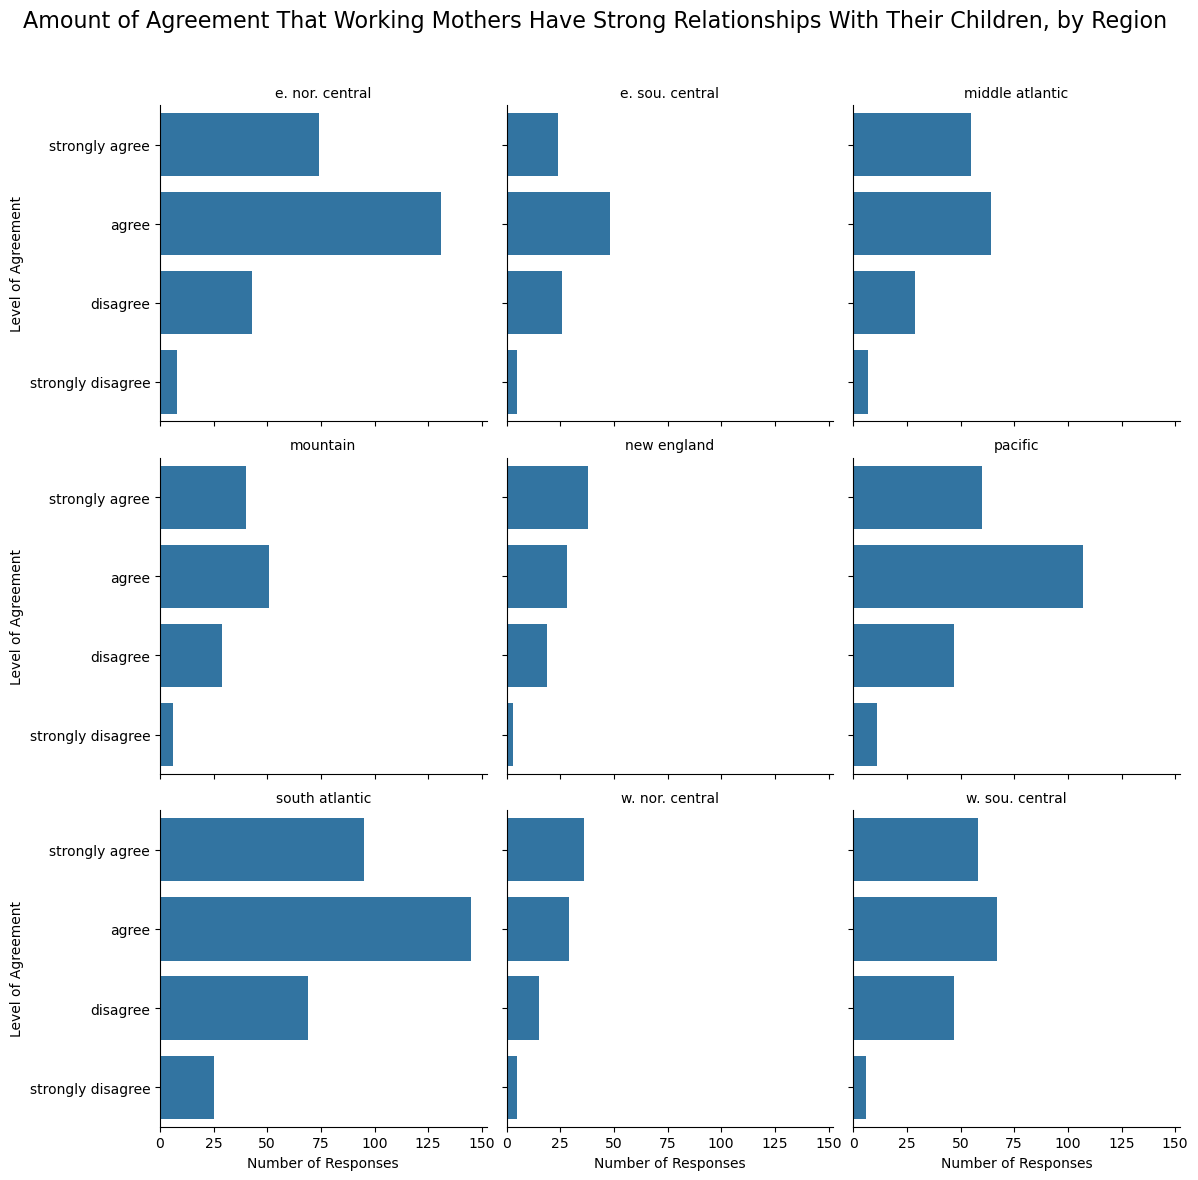

In [44]:
region_rel = gss_clean.groupby(['region', 'relationship']).size().reset_index()
region_rel = region_rel.rename({0:'count'}, axis=1)

g = sns.FacetGrid(region_rel, col = 'region', col_wrap=3, height=4, aspect=1)
g.map(sns.barplot, 'count', 'relationship')
g.set_titles('{col_name}')
g.set_axis_labels('Number of Responses', 'Level of Agreement') 
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Amount of Agreement That Working Mothers Have Strong Relationships With Their Children, by Region', fontsize=16)

## Problem 3
Write code that exactly replicates the following figures, including all aesthetic choices. **Don't worry, however, about making the size of the figures exactly the same as that varies from browser to browser.** All of the following figures are generated by a primary graphing function from `seaborn`. 

### Part a
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/parta.png" width='700'>

[Hint: the values of occuptational prestige and socioeconomic status are the means of `job_prestige` and `socioeconomic_index` within years of `education`. Note that values of `education` less than 8 are excluded.] [2 points]

In [57]:
linedata = gss_clean.groupby('education').agg({'job_prestige':'mean',
                                              'socioeconomic_index': 'mean'})
linedata = linedata.query("education >= 8").reset_index()
linedata = linedata.rename({'job_prestige':'Occupational Prestige', 
                            'socioeconomic_index':'Socioeconomic Status'}, axis=1)
linedata = pd.melt(linedata, id_vars='education',
                  value_vars = ['Occupational Prestige', 'Socioeconomic Status'])
linedata = linedata.rename({'variable':'Index', 'value':'Value'}, axis=1)
linedata

,education,Index,Value
0,8.0,Occupational Prestige,34.575758
1,9.0,Occupational Prestige,37.416667
2,10.0,Occupational Prestige,35.516667
3,11.0,Occupational Prestige,37.494118
4,12.0,Occupational Prestige,39.041667
5,13.0,Occupational Prestige,40.988571
6,14.0,Occupational Prestige,44.095710
7,15.0,Occupational Prestige,43.616667
8,16.0,Occupational Prestige,51.905213
9,17.0,Occupational Prestige,53.885417


(0.0, 80.0)

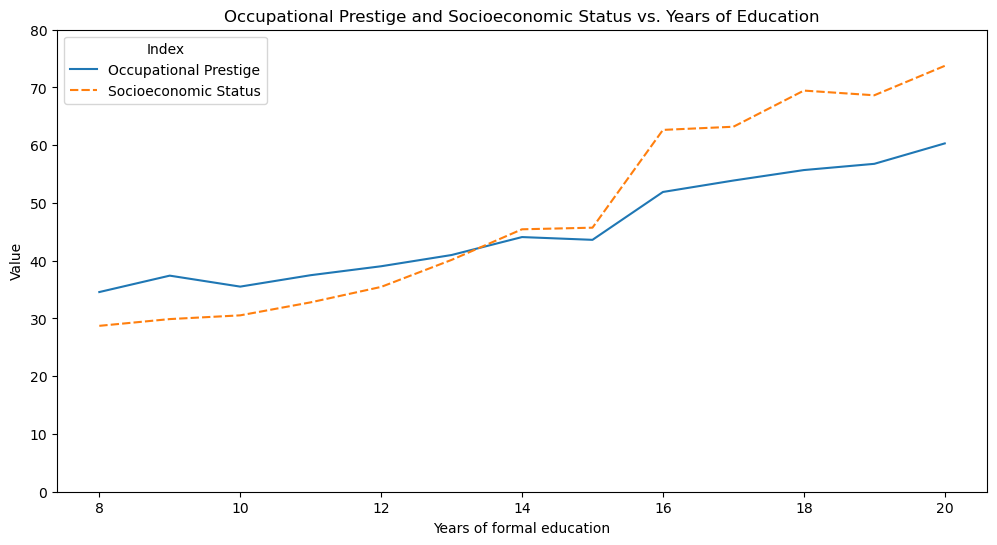

In [58]:
plt.figure(figsize=(12,6))
sns.lineplot(x='education', y='Value', 
             hue='Index', style='Index',
             data=linedata)
plt.xlabel('Years of formal education')
plt.ylabel('Value')
plt.title('Occupational Prestige and Socioeconomic Status vs. Years of Education')
plt.ylim(0,80)

### Part b
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/partb.png" width='700'>

[Hint: to match the color scheme, you will need to set `center=0`.] [2 points]

In [60]:
my_corr = gss_clean.loc[:,['job_prestige','father_job_prestige',
                          'mother_job_prestige', 'income',
                          'socioeconomic_index']].corr()
my_corr

,job_prestige,father_job_prestige,mother_job_prestige,income,socioeconomic_index
job_prestige,1.000000,0.192180,0.189262,0.340995,0.835515
father_job_prestige,0.192180,1.000000,0.235750,0.171048,0.210451
mother_job_prestige,0.189262,0.235750,1.000000,0.164881,0.203486
income,0.340995,0.171048,0.164881,1.000000,0.417210
socioeconomic_index,0.835515,0.210451,0.203486,0.417210,1.000000


Text(0.5, 1.0, 'Correlation Between Personal Economic Indicators')

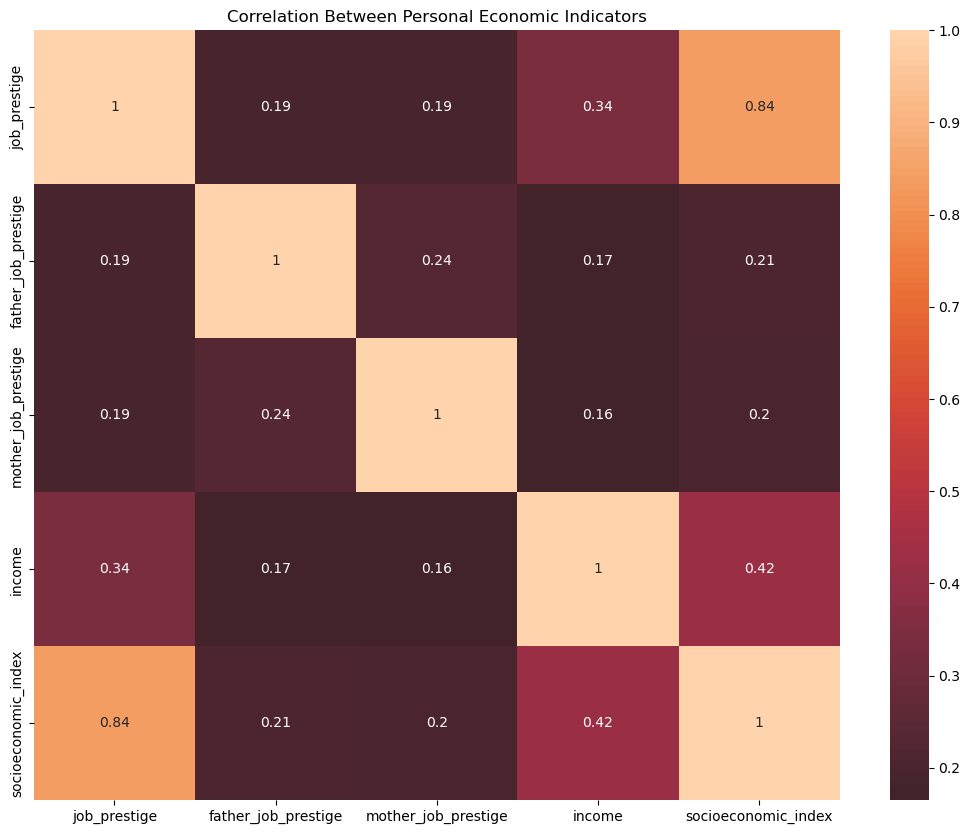

In [65]:
plt.figure(figsize = (13,10))
sns.heatmap(my_corr, annot=True, center=0)
plt.title("Correlation Between Personal Economic Indicators")

### Part c
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/partc2.png" width='600'>

[Hint: The individual plots inside the grid have `height=4` and `aspect=1`, and to include the overall title I used
```
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
```
You will first need to create a version of `education` that collapses values from 0 to 10 to "10 years or fewer" and collapses values from 17 to 20 to "More than 16 years". You can use `.map()`, `.replace()`, or `pd.cut()` to do that.] [3 points]

In [76]:
gss_clean2 = gss_clean.copy()
gss_clean2['ed_cat'] = pd.cut(gss_clean2.education,
                              bins=[-0.1,10,11,12,13,14,15,16,20],
                              labels=('10 years or fewer',
                                      '11 years','12 years',
                                      '13 years','14 years',
                                      '15 years','16 years',
                                      'More than 16 years'))
gss_clean2['ed_cat'].value_counts()

12 years              657
16 years              430
More than 16 years    333
14 years              313
10 years or fewer     207
13 years              183
15 years              127
11 years               95
Name: ed_cat, dtype: int64

Text(0.5, 0.98, 'Income vs. Prestige by Education')

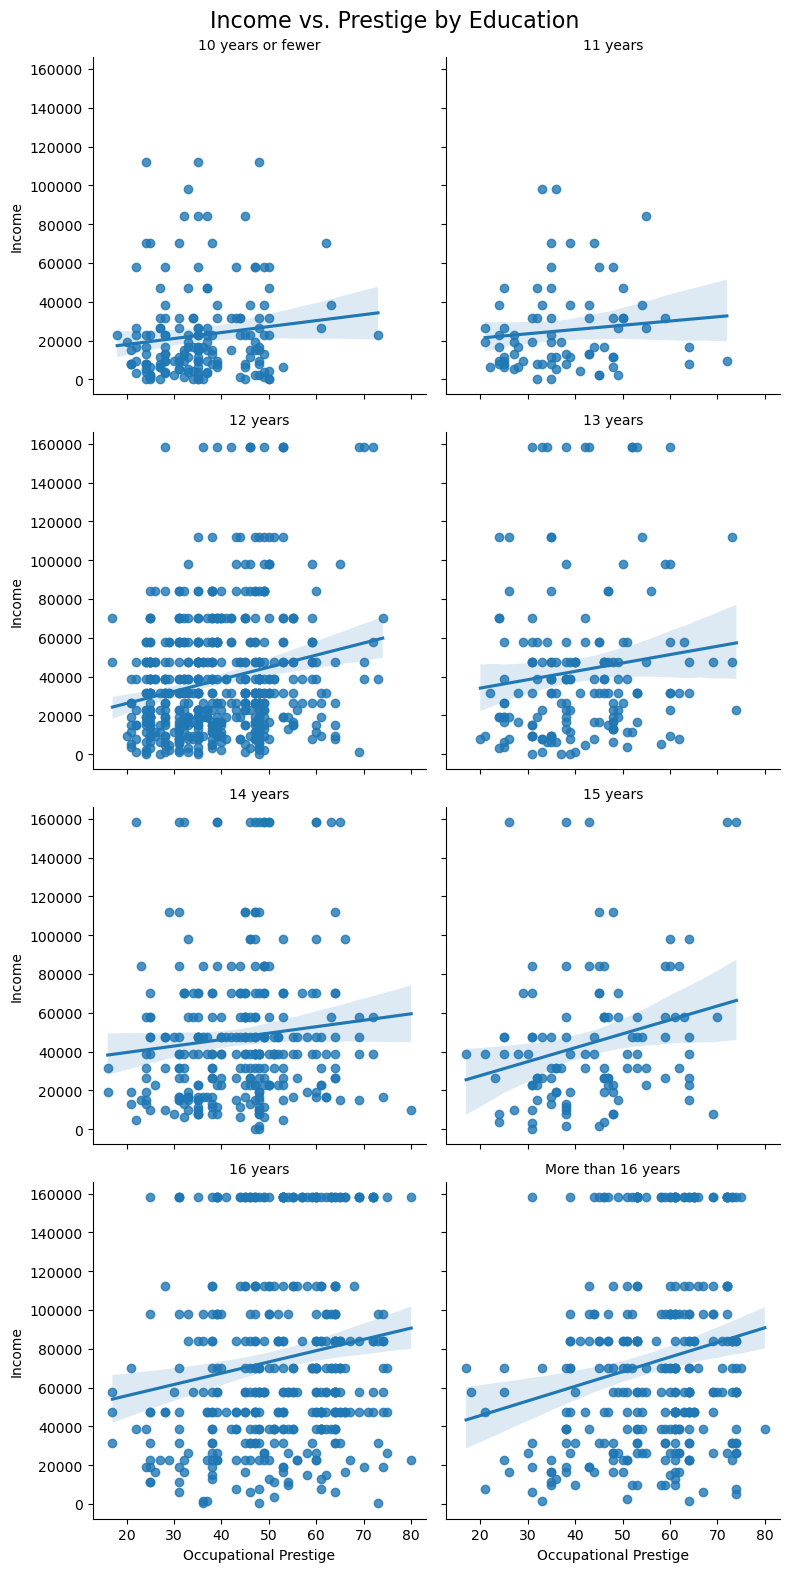

In [78]:
g = sns.FacetGrid(gss_clean2, col='ed_cat', height=4, aspect=1, col_wrap=2)
g.map(sns.regplot, 'job_prestige', 'income', data=gss_clean2)
g.set_titles('{col_name}')
g.set_axis_labels('Occupational Prestige', 'Income')
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)

## Problem 4
There is a consistent finding that in the United States that [women get paid only 80% of what men get paid](https://nwlc.org/issue/equal-pay-and-the-wage-gap/). Other research however finds that the gap is much smaller when comparing [men and women who hold the same job](https://www.politifact.com/factchecks/2018/apr/13/tina-smith/do-women-get-only-80-percent-pay-men-do-same-job/). In this problem you will use the GSS data to investigate the following questions:

1. Do men have higher incomes than women?

2. If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

You may use any kind of data visualization and you may use multiple visualizations to find an answer to these questions. In order to receive credit for this problem, you must write in text what parts of your visualizations are important and what we should learn from the visualizations to answer the questions. Please consider the entire distributions of income and occupational prestige, not just the means or medians. [4 points]

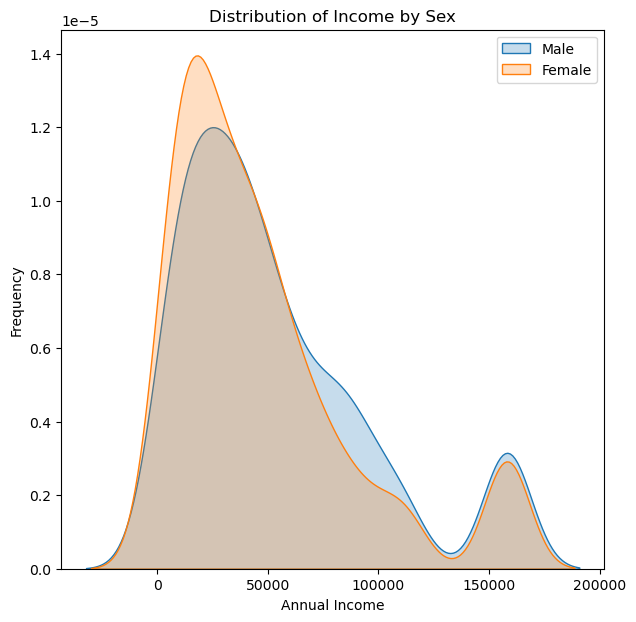

In [108]:
plt.figure(figsize=(7,7))
sns.kdeplot(gss_clean.query("sex == 'male'")['income'], fill=True, label='Male')
sns.kdeplot(gss_clean.query("sex == 'female'")['income'], fill=True, label='Female')
plt.ylabel('Frequency')
plt.xlabel('Annual Income')
plt.title('Distribution of Income by Sex')
plt.legend()

When looking at the distribution of annual income for men and women, we see that the distributions are fairly similar. There are much larger quantities of women recorded as having annual incomes less than 50,000 than men, but this may be due to how the surevey data was collected. When looking at incomes higher than 100,000 we see nearly identical frequencies for both men and women so this shows there is not a large discrepancy based on gender in the highest earning categories. There seem to be more men than women earning between 50,000 and 100,000, but not to an alarming degree.

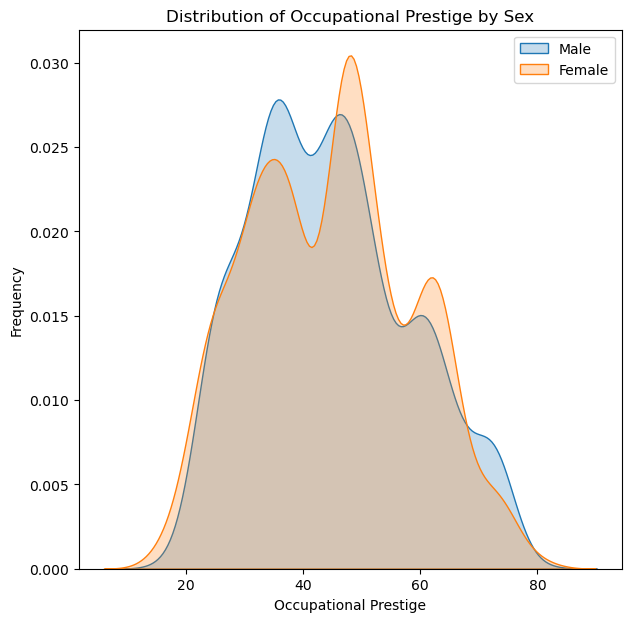

In [109]:
plt.figure(figsize=(7,7))
sns.kdeplot(gss_clean.query("sex == 'male'")['job_prestige'], fill=True, label='Male')
sns.kdeplot(gss_clean.query("sex == 'female'")['job_prestige'], fill=True, label='Female')
plt.ylabel('Frequency')
plt.xlabel('Occupational Prestige')
plt.title('Distribution of Occupational Prestige by Sex')
plt.legend()

In order to determine whether job prestige is significantly different between men and women we can use the plot above. Here, we see that men more frequently have prestige values in the lower ranges than women, but overall sex does not seem to impact job prestige signifcantly. 

Text(0.5, 1.0, 'Evaluations of Occupational Prestige vs. Income, by Sex')

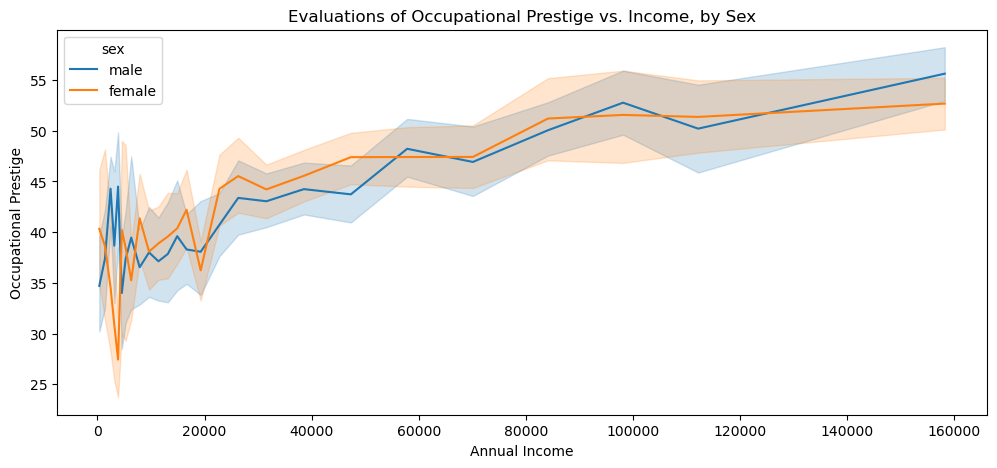

In [113]:
plt.figure(figsize=(12,5))
sns.lineplot(y='job_prestige', x='income', hue='sex',
             data=gss_clean)
plt.ylabel('Occupational Prestige')
plt.xlabel('Annual Income')
plt.title('Evaluations of Occupational Prestige vs. Income, by Sex')

Although we did not see a large difference in annual income or in job prestige for men and women, by looking at the line plot above we can determine if job prestige impacts income differently for men and women. The line plot shows a lot of variation in ocupation prestige ratings for income values less than 20,000, but then it flattens out to a more linear relationship. Seeing that the lines for men and women stick very close together, we do not seem to have enough evidence to believe there is a significant difference between men and women. These three plots work together to show that men do not have higher salaries than women on average, and any difference that there is for income is not explained by occupational prestige.